In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import copy
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from RashomonSetAnalyser import RashomonSetAnalyser
import pickle
import xgboost as xgb

In [3]:
results = np.load('results.npy', allow_pickle=True)
results.sort_values(by = 'mean_test_score', inplace = True, ascending = False)
results.reset_index(inplace = True)

In [4]:
best_model = results.iloc[0].params

In [5]:
rashomon = RashomonSetAnalyser()

In [6]:
X = np.load("X48.npy")
column_names = np.load('column_names.npy', allow_pickle = True)
X = pd.DataFrame(data = X, columns = column_names)
with open('y.npy', 'rb') as f:
    labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)
def model_learn(X, y, params):
    model = xgb.XGBClassifier(objective = 'binary:logistic', n_jobs = -1, eval_metric = 'auc', use_label_encoder = False, seed = 123)
    model.set_params(**params)
    return model.fit(X, y)

In [50]:
best_models_tab = []
for i in range(15):
    best_models_tab.append(model_learn(X, y, results.iloc[i].params))
    print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [51]:
rashomon.set_base_model(best_models_tab[0])
rashomon.set_models(best_models_tab[1:])

In [52]:
rashomon.models

[['model0',
  XGBClassifier(alpha=12.854579625070118, base_score=0.5, booster='gbtree',
                colsample_bylevel=0.7371052631578947, colsample_bynode=1,
                colsample_bytree=0.6845263157894736, eval_metric='auc', gamma=0,
                gpu_id=-1, importance_type='gain', interaction_constraints='',
                lambda=0.07779328684150147, learning_rate=0.07779328684150147,
                max_delta_step=0, max_depth=11,
                min_child_weight=2.151381172440365, missing=nan,
                monotone_constraints='()', n_estimators=180, n_jobs=-1,
                num_parallel_tree=1, random_state=123, reg_alpha=12.8545799,
                reg_lambda=0.0777932853, scale_pos_weight=1, seed=123,
                subsample=0.6684210526315789, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, ...)],
 ['model1',
  XGBClassifier(alpha=0.33472602530611795, base_score=0.5, booster='gbtree',
                colsample_bylevel=0.526

In [53]:
answer=rashomon.pdp_comparator(X, y)
answer

C:\Users\Maciek\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13
0,albumin_min,0.582661,0.796533,0.864516,0.336867,0.499094,0.117758,0.731000,0.256746,0.341788,0.081415,0.258333,0.040181,0.578703,0.622774
1,bicarbonate_min,0.328848,0.633176,0.437815,0.120017,0.642066,0.062468,0.946306,0.308380,0.568181,0.275124,0.112974,0.376505,0.479735,0.541198
2,bun_min,0.503532,0.254012,0.612883,0.096395,0.319882,0.065339,0.821360,0.075864,0.365474,0.143612,0.329986,0.014278,0.423045,0.303613
3,calcium_min,0.849205,1.614087,1.407563,0.477241,0.910188,0.562231,1.214159,0.706733,0.719664,0.567091,0.539165,0.623489,0.516214,0.712660
4,creatinine_min,0.550921,1.692719,1.224062,0.751788,0.404386,0.517922,0.423320,0.715664,0.616346,0.368104,0.203487,0.152660,0.754463,0.365288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,resprate_std,0.495250,0.449849,0.370965,0.254882,0.578356,0.075298,1.034294,0.279796,0.556841,0.238229,0.237108,0.056714,0.654754,0.348569
72,sodium_std,0.433129,0.389927,0.527829,0.116635,0.411713,0.147593,0.310914,0.150457,0.188260,0.154249,0.189971,0.164741,0.335441,0.524502
73,spo2_std,0.687846,1.895705,1.871879,0.783161,1.197313,1.288569,0.938732,1.518625,1.138716,1.736299,1.054267,1.216517,1.347972,1.870379
74,sysbp_std,0.758506,2.210461,1.801867,0.839715,1.352640,1.287896,1.303403,1.192008,1.343600,1.218103,0.942108,1.123683,0.313809,1.353340


<ipython-input-78-82707dbc9015>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


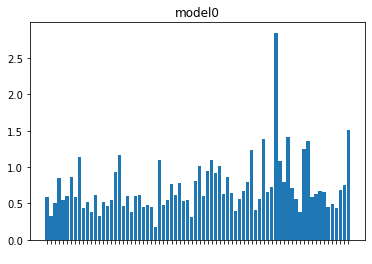

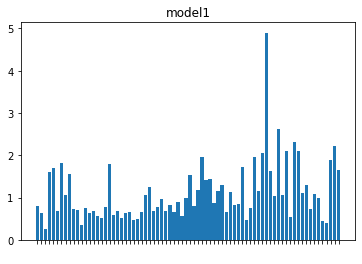

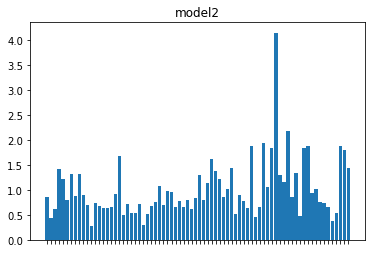

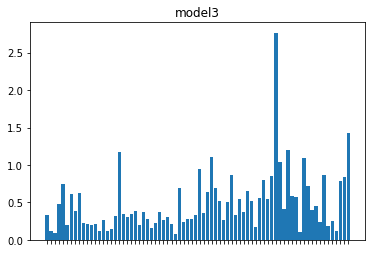

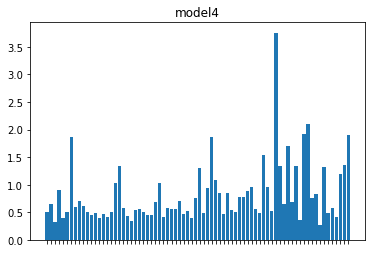

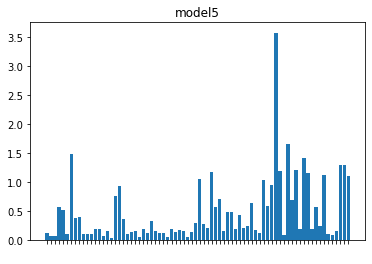

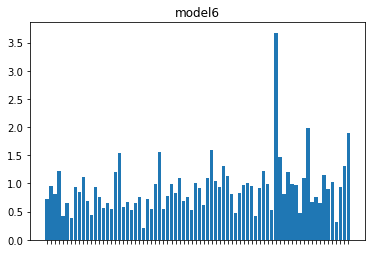

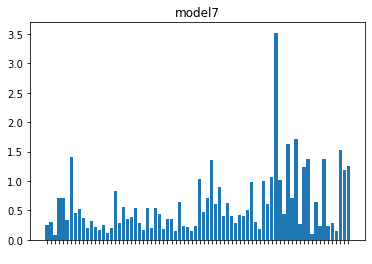

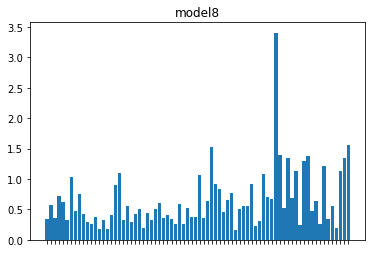

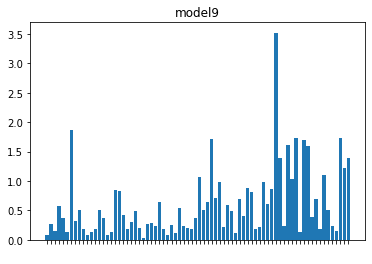

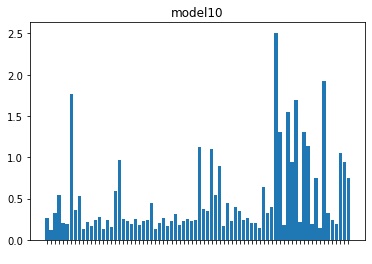

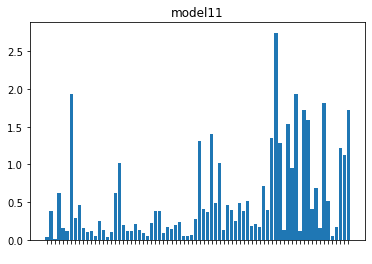

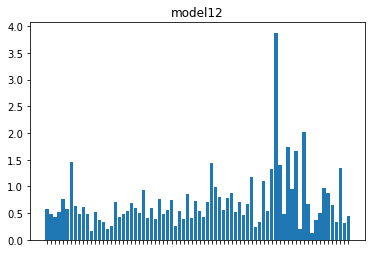

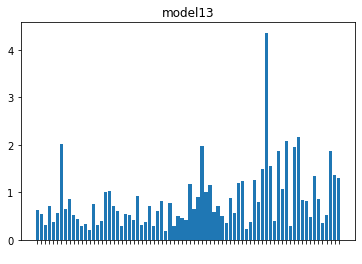

In [78]:
labels=[" "]*answer.shape[0]
for i in range(answer.shape[1]-1):
    fig, ax = plt.subplots()
    plt.bar(x=answer.iloc[:,0],height=answer.iloc[:,1+i])
    ax.set_title(answer.columns[i+1])
    ax.set_xticklabels(labels)
    plt.show()


In [55]:
answer.iloc[:,1].sort_values(ascending=False)

57    2.849296
75    1.507040
60    1.411811
54    1.384505
65    1.360559
        ...   
21    0.386318
1     0.328848
13    0.326996
36    0.313799
27    0.174672
Name: model0, Length: 76, dtype: float64

In [56]:
answer.iloc[:,2].sort_values(ascending=False)

57    4.899044
60    2.622280
64    2.323051
74    2.210461
62    2.111978
        ...   
24    0.468468
71    0.449849
72    0.389927
11    0.348408
2     0.254012
Name: model1, Length: 76, dtype: float64

In [57]:
answer.iloc[:,3].sort_values(ascending=False)

57    4.145710
60    2.184895
54    1.934111
65    1.879066
51    1.872723
        ...   
52    0.450073
1     0.437815
71    0.370965
24    0.304323
11    0.282079
Name: model2, Length: 76, dtype: float64

In [58]:
answer.iloc[:,4].sort_values(ascending=False)

57    2.766379
75    1.429297
60    1.197599
18    1.178581
41    1.106359
        ...   
13    0.114868
15    0.113277
63    0.101588
2     0.096395
32    0.083579
Name: model3, Length: 76, dtype: float64

In [59]:
answer.iloc[:,0][57]

'albumin_std'

In [60]:
answer.iloc[:,0][60]

'calcium_std'

55.101437985897064
84.94526234269142
76.55417367815971
37.52999607473612
62.53120228648186
36.18580285459757
70.06240603327751
45.39303082972765
49.3235724568367
45.93833042681217
37.52765616774559
40.31266997754574
54.02648577094078
64.14790754020214


<BarContainer object of 14 artists>

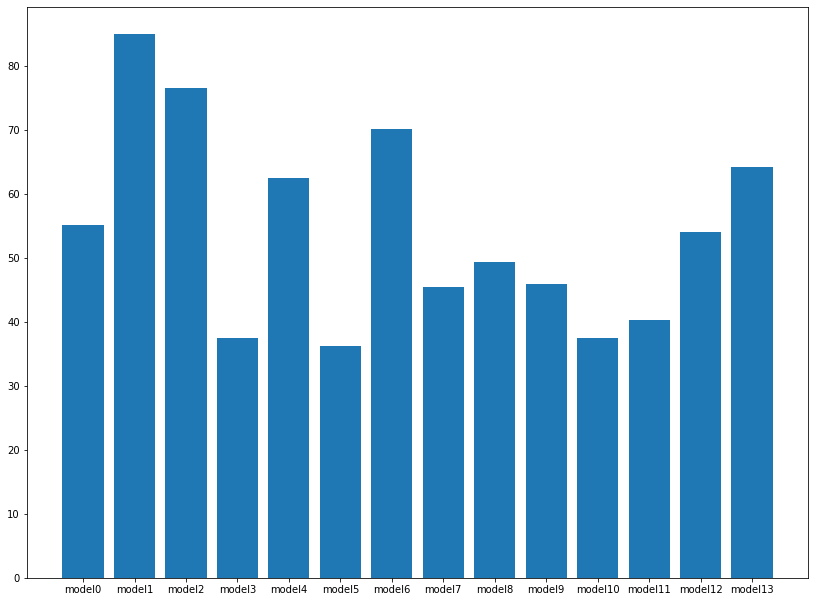

In [83]:
sums=[]
names=[]
for i in range(answer.shape[1]-1):
    print(sum(answer.iloc[:,i+1]))
    sums.append(sum(answer.iloc[:,1+i]))
    names.append("model"+str(i))
fig, ax = plt.subplots()
fig.set_size_inches(answer.shape[1]-1, 10.5)
plt.bar(height=sums,x=names)

In [62]:
answer2=rashomon.pdp_comparator(X, y, metric='sum')
answer2

C:\Users\Maciek\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13
0,albumin_min,0.582661,0.796533,0.864516,0.332777,0.499094,-0.105935,0.731000,0.249020,0.341246,0.065153,-0.258333,-0.010713,0.572555,0.616376
1,bicarbonate_min,0.217265,0.633176,0.437815,0.088926,0.642066,0.010297,0.946306,0.301105,0.568181,0.271672,-0.112974,0.375208,0.103570,0.540923
2,bun_min,0.503532,0.254012,0.612883,0.084776,0.319882,-0.065339,0.821360,-0.038136,0.365454,-0.135046,-0.329986,0.000129,0.362275,0.296463
3,calcium_min,0.849205,1.614087,1.407563,0.460671,0.910188,0.515537,1.214159,0.643053,0.704653,0.439428,0.319263,0.601368,0.216847,0.582131
4,creatinine_min,0.537080,1.692719,1.220715,0.370342,0.286893,0.195588,0.411558,0.499683,0.403393,0.026369,-0.055700,0.026587,0.566723,0.093980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,resprate_std,0.495250,0.449849,0.335705,0.234316,0.578356,-0.075298,1.034294,0.241530,0.548370,0.180382,-0.237108,0.031944,-0.022087,0.260902
72,sodium_std,0.433129,0.378568,0.520677,0.092683,0.411713,0.005118,-0.010313,0.063947,0.177608,0.036824,-0.117977,0.164456,-0.156228,0.491224
73,spo2_std,0.643985,1.895705,1.871879,0.601481,1.167376,0.992963,0.907260,1.333671,1.114790,1.401793,0.661169,0.904837,1.083222,1.744649
74,sysbp_std,0.752026,2.210461,1.801867,0.701805,1.236765,1.081616,1.299750,1.042652,1.315764,0.794710,0.455049,0.742613,-0.056588,1.130502


<ipython-input-77-c969b4256b67>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


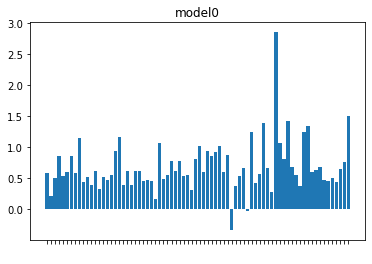

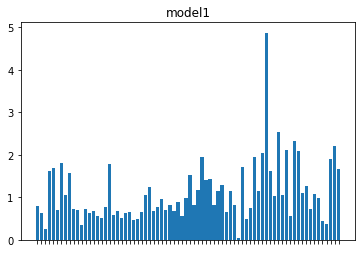

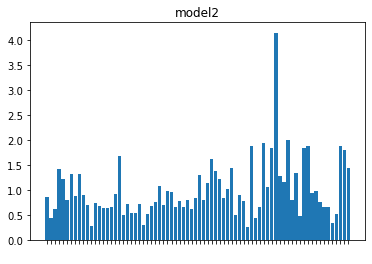

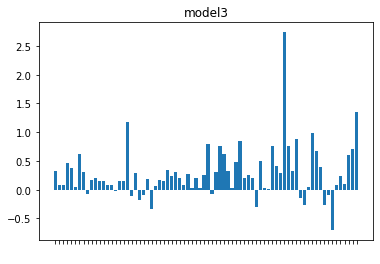

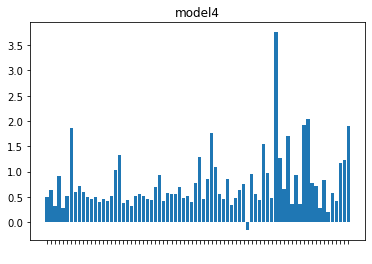

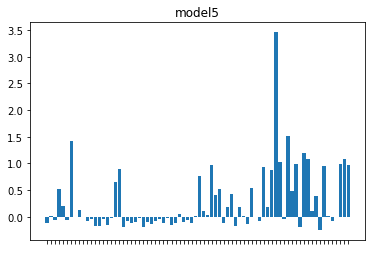

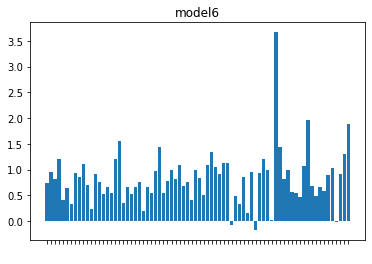

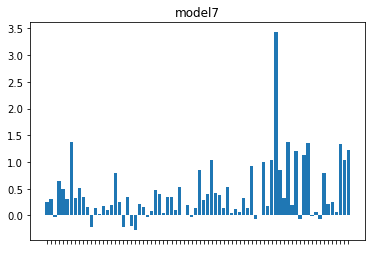

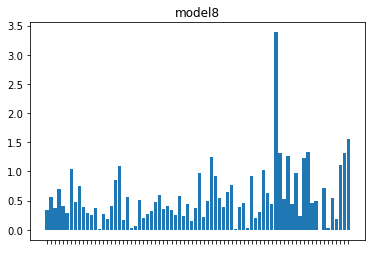

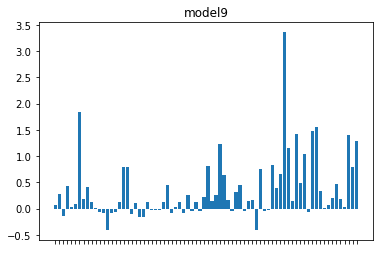

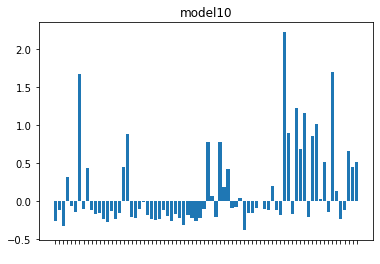

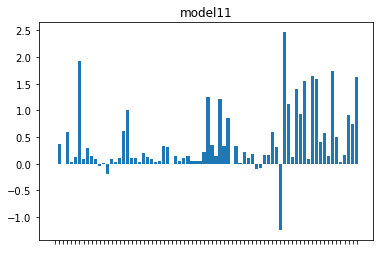

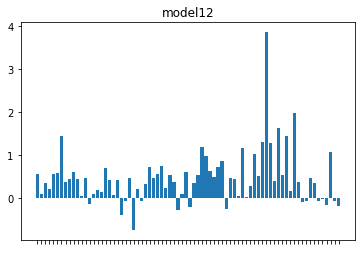

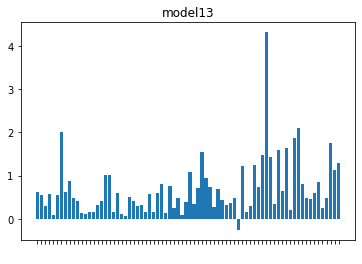

In [77]:
labels=[" "]*answer.shape[0]
for i in range(answer2.shape[1]-1):
    fig, ax = plt.subplots()
    plt.bar(x=answer2.iloc[:,0],height=answer2.iloc[:,1+i])
    ax.set_xticklabels(labels)
    ax.set_title(answer.columns[i+1])
    plt.show()


In [64]:
answer2.iloc[:,4].sort_values(ascending=False)

57    2.738066
75    1.353270
18    1.174626
64    0.981022
60    0.883141
        ...   
67   -0.261743
62   -0.266558
50   -0.298689
24   -0.335525
69   -0.699810
Name: model3, Length: 76, dtype: float64

In [74]:
colors=answer.copy()
i=0
for j in range(answer.shape[1]-1):
    for i in range(answer.shape[0]):
        if(answer2.iloc[i,1+j]>0.5*answer.iloc[i,1+j]):
            colors.iloc[i,1+j]="green"
        elif(answer2.iloc[i,1+j]< -0.5*answer.iloc[i,1+j]):
            colors.iloc[i,1+j]="red"
        else:
            colors.iloc[i,1+j]="gray"

In [79]:
colors

,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13
0,albumin_min,green,green,green,green,green,red,green,green,green,green,red,gray,green,green
1,bicarbonate_min,green,green,green,green,green,gray,green,green,green,green,red,green,gray,green
2,bun_min,green,green,green,green,green,red,green,red,green,red,red,gray,green,green
3,calcium_min,green,green,green,green,green,green,green,green,green,green,green,green,gray,green
4,creatinine_min,green,green,green,gray,green,gray,green,green,green,gray,gray,gray,green,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,resprate_std,green,green,green,green,green,red,green,green,green,green,red,green,gray,green
72,sodium_std,green,green,green,green,green,gray,gray,gray,green,gray,red,green,gray,green
73,spo2_std,green,green,green,green,green,green,green,green,green,green,green,green,green,green
74,sysbp_std,green,green,green,green,green,green,green,green,green,green,gray,green,gray,green


<ipython-input-76-04c96b770e41>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


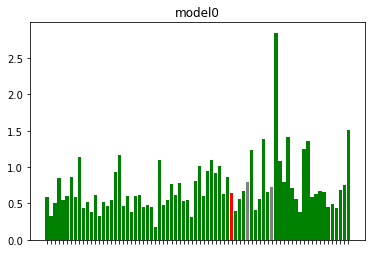

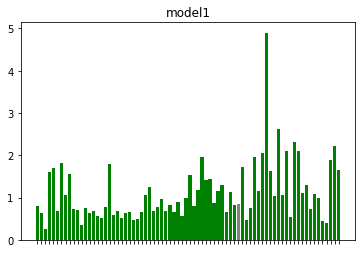

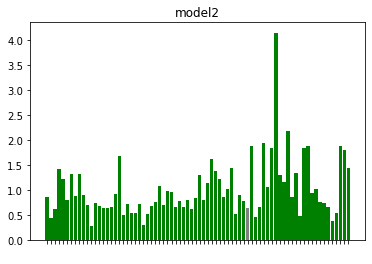

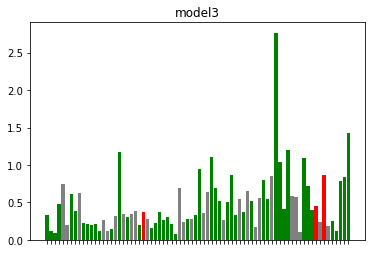

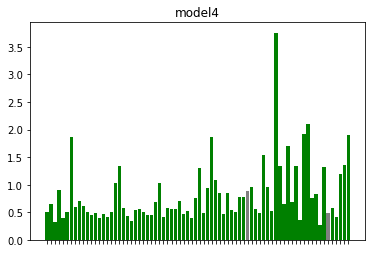

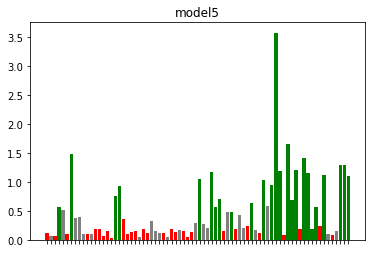

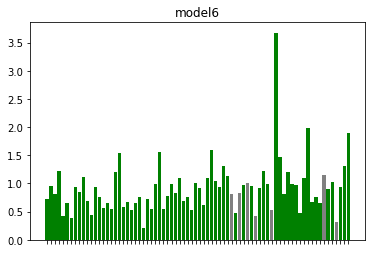

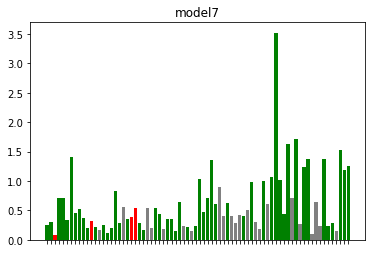

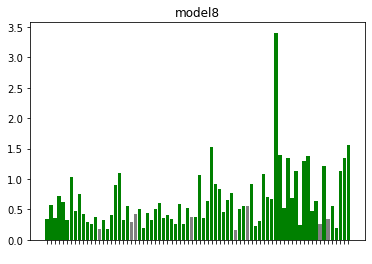

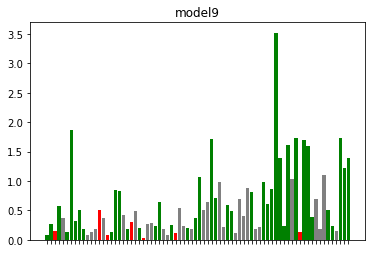

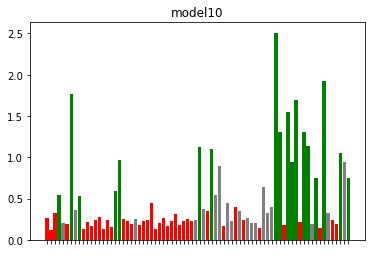

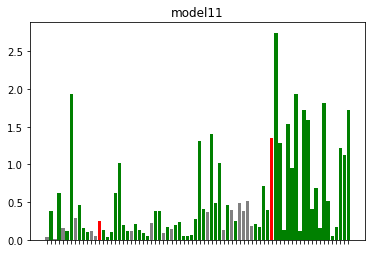

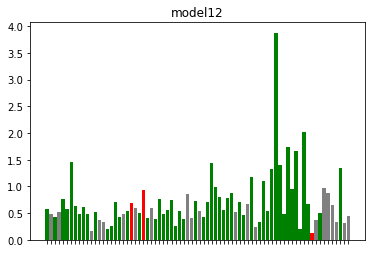

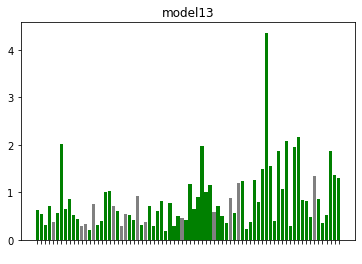

In [76]:
labels=[" "]*answer.shape[0]
for i in range(answer.shape[1]-1):
    fig, ax = plt.subplots()
    plt.bar(x=answer.iloc[:,0],height=answer.iloc[:,1+i],color=colors.iloc[:,1+i])
    ax.set_xticklabels(labels)
    ax.set_title(answer.columns[i+1])
    plt.show()

In [84]:
answer.to_csv("answer.csv")

In [85]:
answer2.to_csv("answer2.csv")